In [2]:
# imports
import pandas as pd
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from aux_clustering import *

c:\Users\Lucas\Desktop\Universidad\Mineria de Datos\Proyecto\Proyecto_mineria_cc5205\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# import data
df = pd.read_csv('adult.data.csv', header=None)
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
print('Cantidad de registros: ', df.shape[0])
df.dropna(inplace=True)

# drop columnas que no nos interesan 
df.drop(['fnlwgt', 'native_country', 'education'], axis=1, inplace=True)

# segmentacion de columnas
num_cols = df.select_dtypes(include=['int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
print('Columnas numericas: ', num_cols, '\nColumnas categoricas: ', cat_cols)


Cantidad de registros:  32561
Columnas numericas:  Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object') 
Columnas categoricas:  Index(['workclass', 'marital_status', 'occupation', 'relationship', 'race',
       'sex', 'income'],
      dtype='object')


## Dataset Full

In [6]:
# preprocesamiento 

df_full = df.copy().sample(1000, random_state=42)

df_full_scaled = preprocess(df = df_full,
                            scaler_method_name ='PowerTransform',
                            numerical_cols = num_cols,
                            encoder_method_name = 'OneHotEncoder',
                            categorical_cols = cat_cols)
                            

Silhouette score visualization saved
Metricas para Kmeans
Silhouette Score: 0.1677996400196816
Davies-Bouldin Index: 1.8742808049135937
Calinski-Harabasz Index: 163.9421022414014

Cantidad de datos por cluster:
Cluster 0: 298 datos
Cluster 1: 50 datos
Cluster 2: 243 datos
Cluster 3: 314 datos
Cluster 4: 95 datos


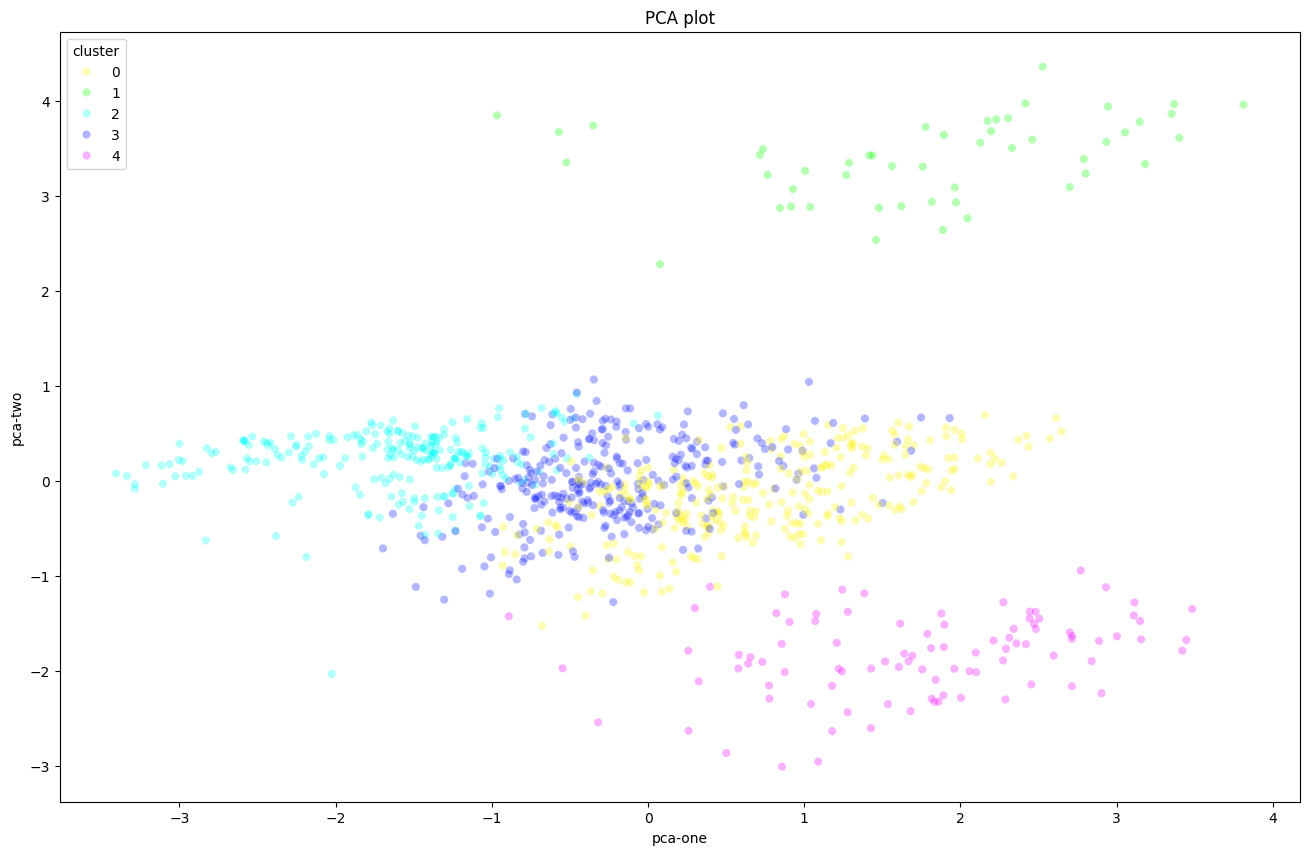

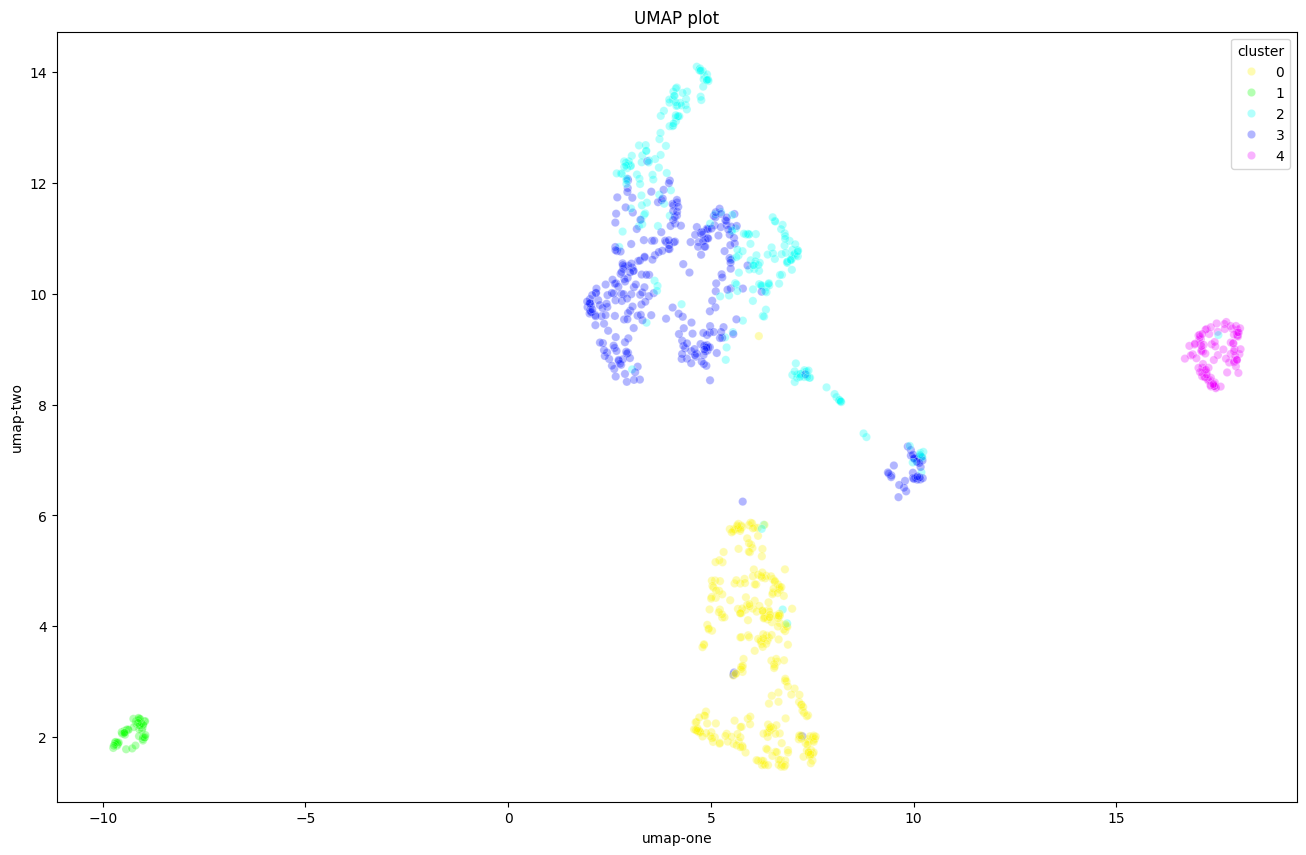

In [45]:
# Kmeans Clustering

model = 'Kmeans'
dataset = 'Full'
output_path = 'resultados/' + dataset + '_' + model

# folder de salida
if not os.path.exists(output_path):
    os.makedirs(output_path)


# metodo de silhouete score
k_optimo = silhoutte_method(df = df_full_scaled, model_name = model, output_file_path = output_path + '/silhouette.png')

# clustering
df_full_clustered, df_full_scaled_clustered = get_clusters(df_full, df_full_scaled,model,k_optimo)

# metricas
get_metrics(df_full_scaled_clustered, model)

# visualizaciones
plot_PCA(df_full_scaled_clustered, output_path + '/pca')
plot_UMAP(df_full_scaled_clustered, output_path + '/umap')


Silhouette score visualization saved
Metricas para kmeans_full
Silhouette Score: 0.292052183725219
Davies-Bouldin Index: 1.275614270349166
Calinski-Harabasz Index: 157.2257614043592

Cantidad de datos por cluster:
Cluster 0: 856 datos
Cluster 1: 94 datos
Cluster 2: 50 datos


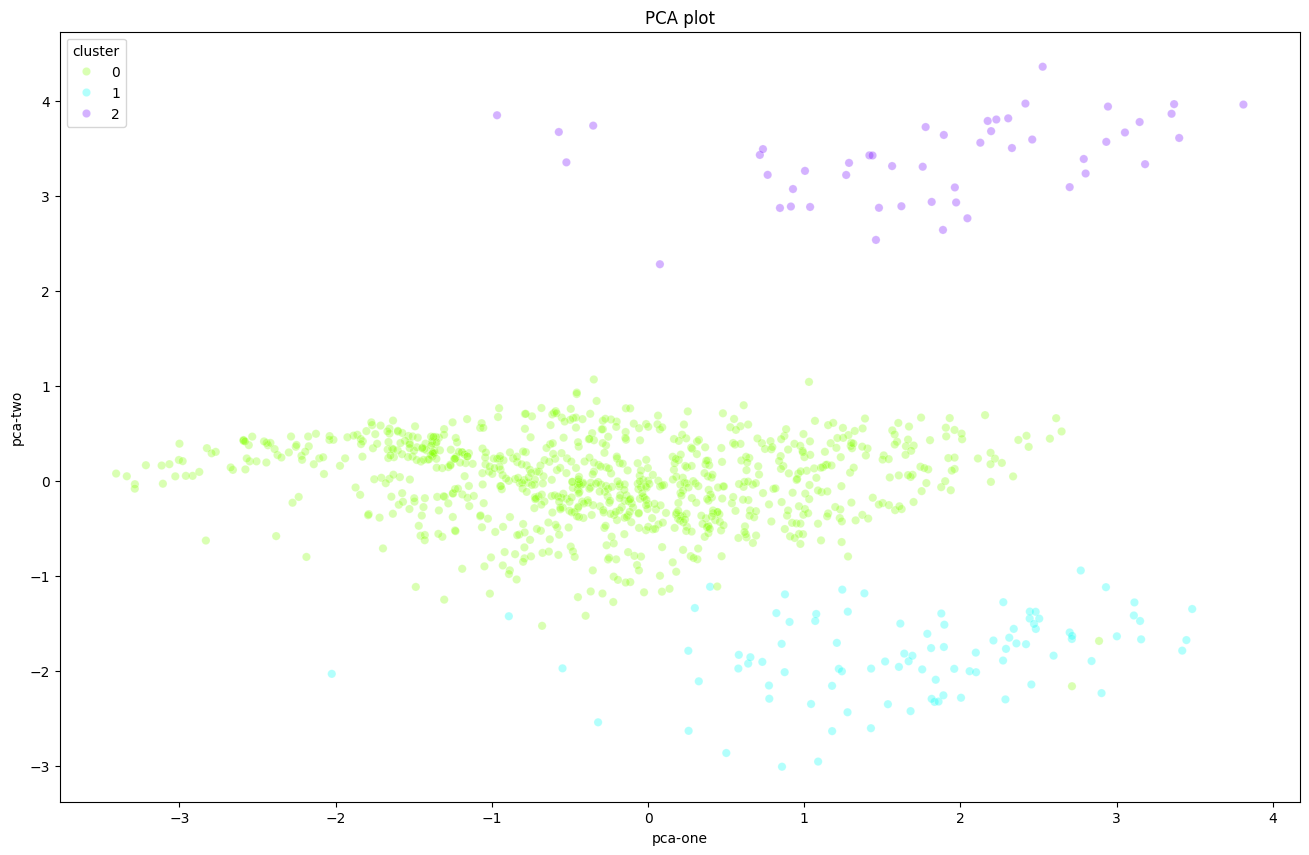

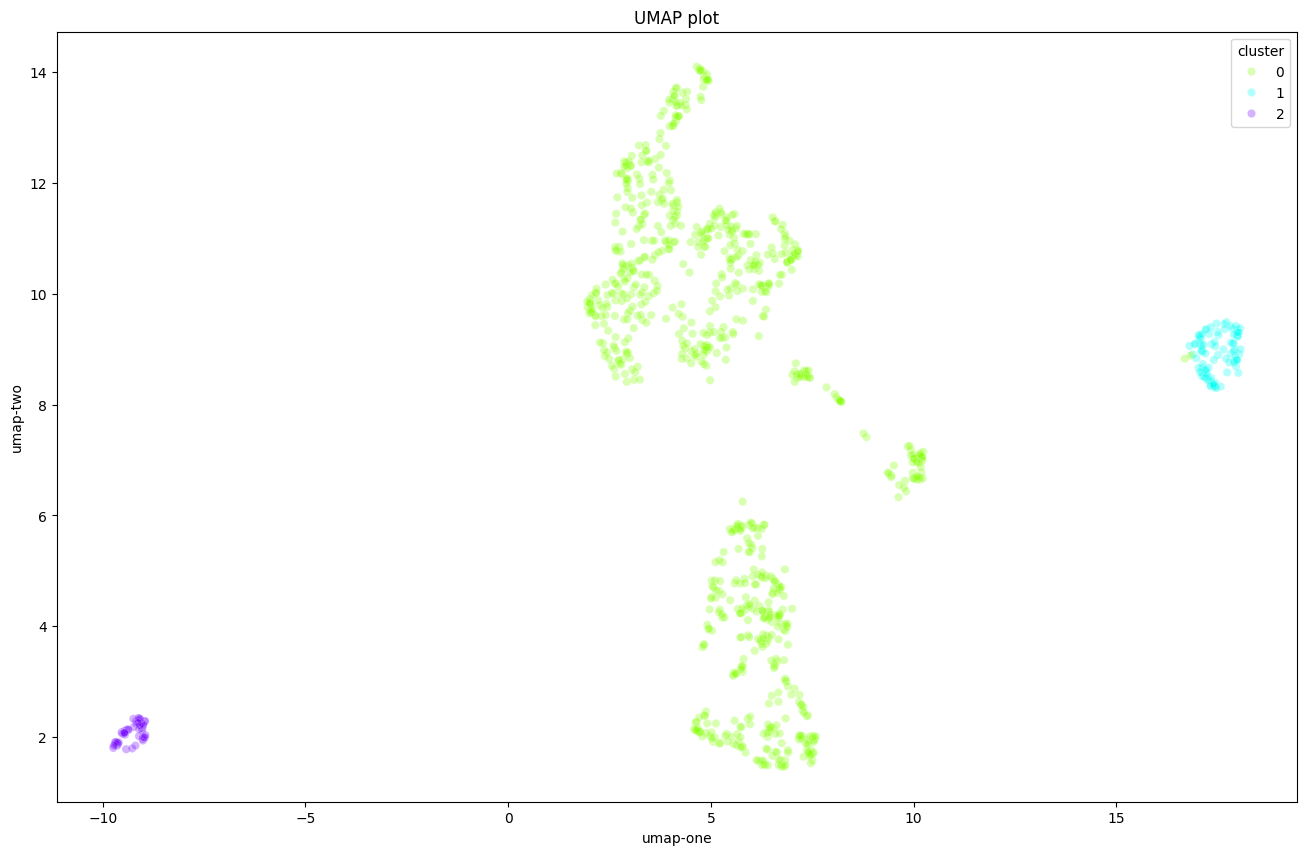

In [43]:
# Agglomerative Clustering

model = 'Agglomerative'
dataset = 'Full'
output_path = 'resultados/' + dataset + '_' + model

# folder de salida
if not os.path.exists(output_path):
    os.makedirs(output_path)


# metodo de silhouete score
k_optimo = silhoutte_method(df = df_full_scaled, model_name = model, output_file_path = output_path + '/silhouette.png')

# clustering
df_full_clustered, df_full_scaled_clustered = get_clusters(df_full, df_full_scaled, model, k_optimo)

# metricas
get_metrics(df_full_scaled_clustered, model)

# visualizaciones
plot_PCA(df_full_scaled_clustered, output_path + '/pca')
plot_UMAP(df_full_scaled_clustered, output_path + '/umap')

Silhouette score visualization saved
Metricas para GaussianMixture
Silhouette Score: 0.14788926388066062
Davies-Bouldin Index: 2.693498437950285
Calinski-Harabasz Index: 136.2332148683164

Cantidad de datos por cluster:
Cluster 0: 299 datos
Cluster 1: 50 datos
Cluster 2: 393 datos
Cluster 3: 162 datos
Cluster 4: 96 datos


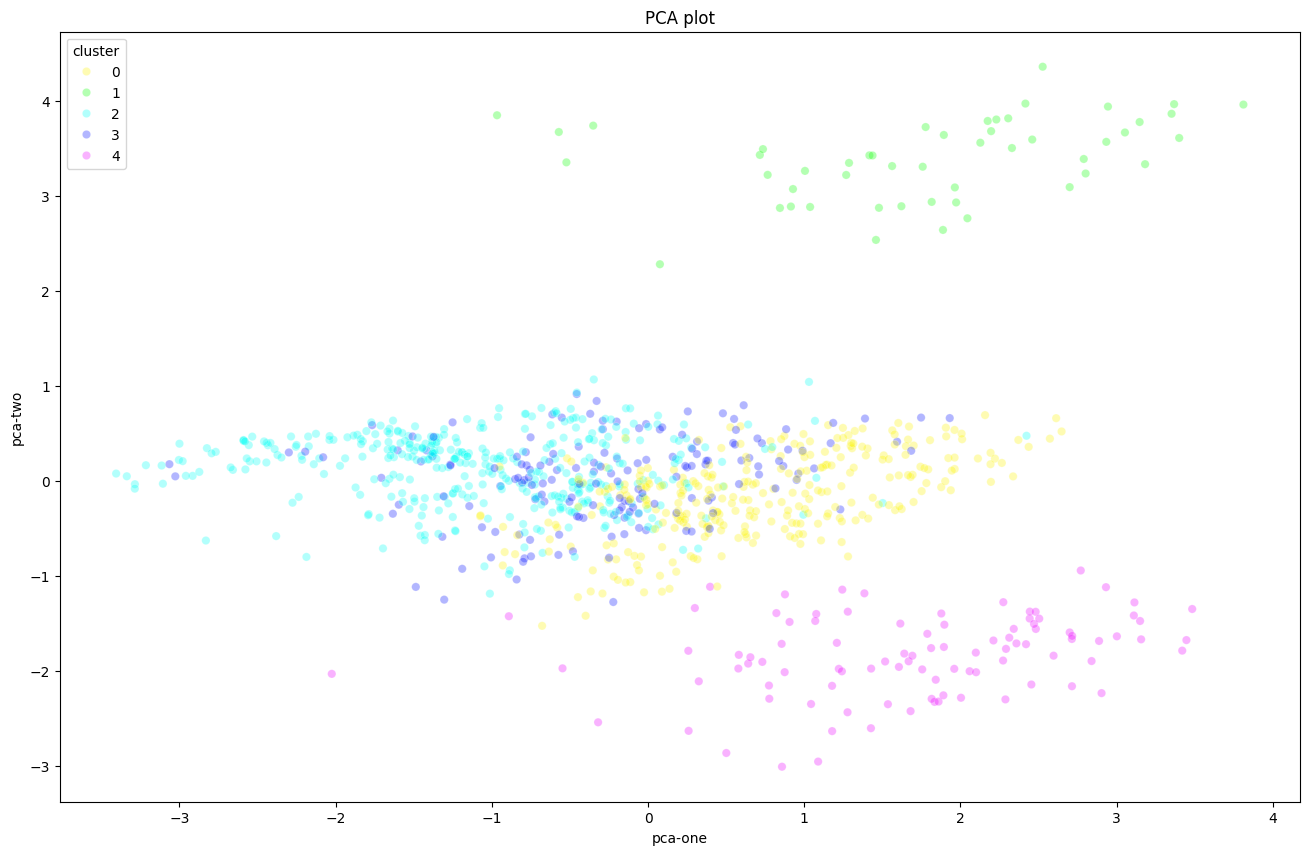

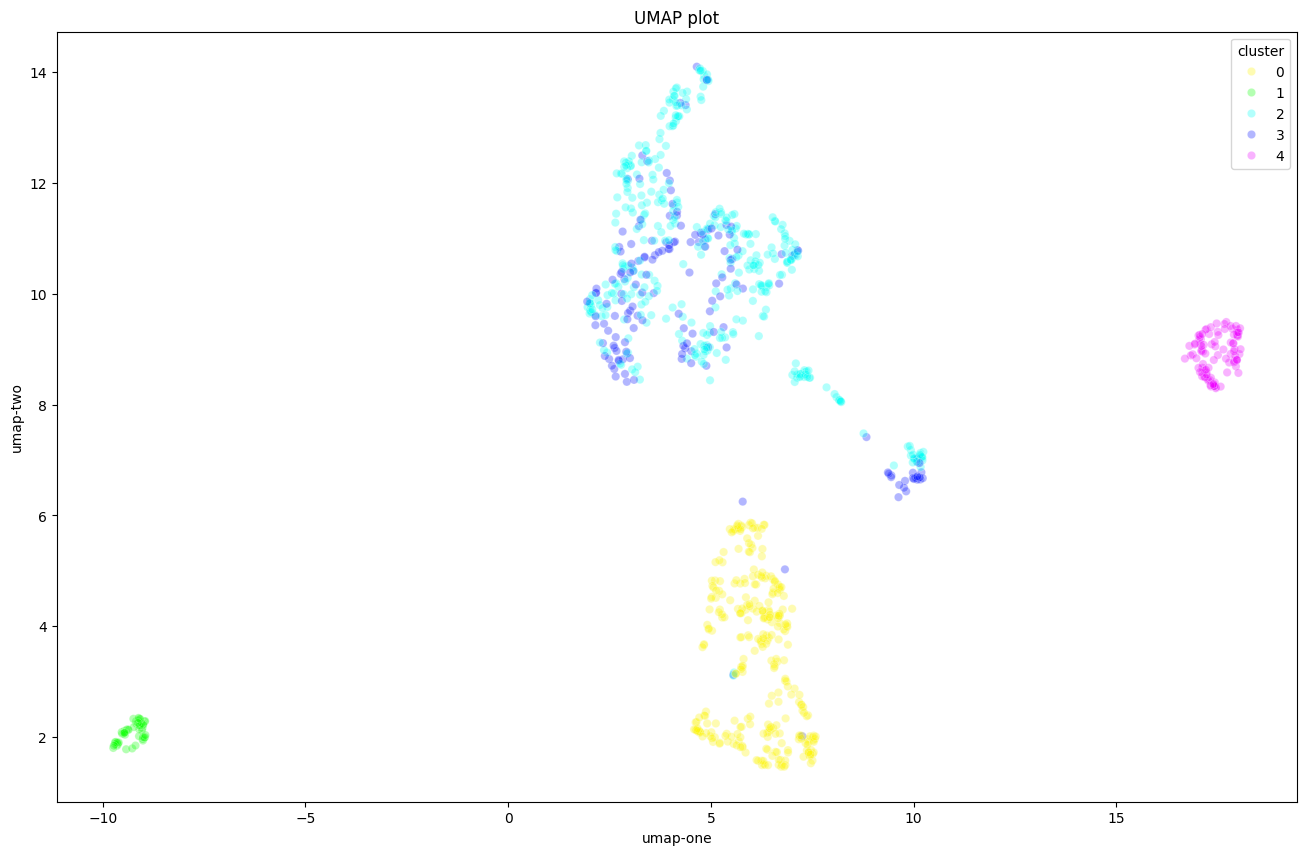

In [44]:
# GaussianMixture Clustering

model = 'GaussianMixture'
dataset = 'Full'
output_path = 'resultados/' + dataset + '_' + model

# folder de salida
if not os.path.exists(output_path):
    os.makedirs(output_path)


# metodo de silhouete score
k_optimo = silhoutte_method(df = df_full_scaled, model_name = model, output_file_path = output_path + '/silhouette.png')

# clustering
df_full_clustered, df_full_scaled_clustered = get_clusters(df_full, df_full_scaled, model, k_optimo)

# metricas
get_metrics(df_full_scaled_clustered, model)

# visualizaciones
plot_PCA(df_full_scaled_clustered, output_path + '/pca')
plot_UMAP(df_full_scaled_clustered, output_path + '/umap')

## Dataset sin SEX-RACE

In [10]:
df_reduced = df.copy().sample(1000, random_state=42)
df_reduced.drop(['sex', 'race'], axis=1, inplace=True)

In [11]:
df_reduced_scaled = preprocess(df = df_reduced,
                            scaler_method_name ='PowerTransform',
                            numerical_cols = num_cols,
                            encoder_method_name = 'OneHotEncoder',
                            categorical_cols = cat_cols)

Silhouette score visualization saved
Metricas para Kmeans
Silhouette Score: 0.1781675141749086
Davies-Bouldin Index: 1.6857823880362495
Calinski-Harabasz Index: 188.12404556174562

Cantidad de datos por cluster:
Cluster 0: 217 datos
Cluster 1: 333 datos
Cluster 2: 50 datos
Cluster 3: 304 datos
Cluster 4: 96 datos


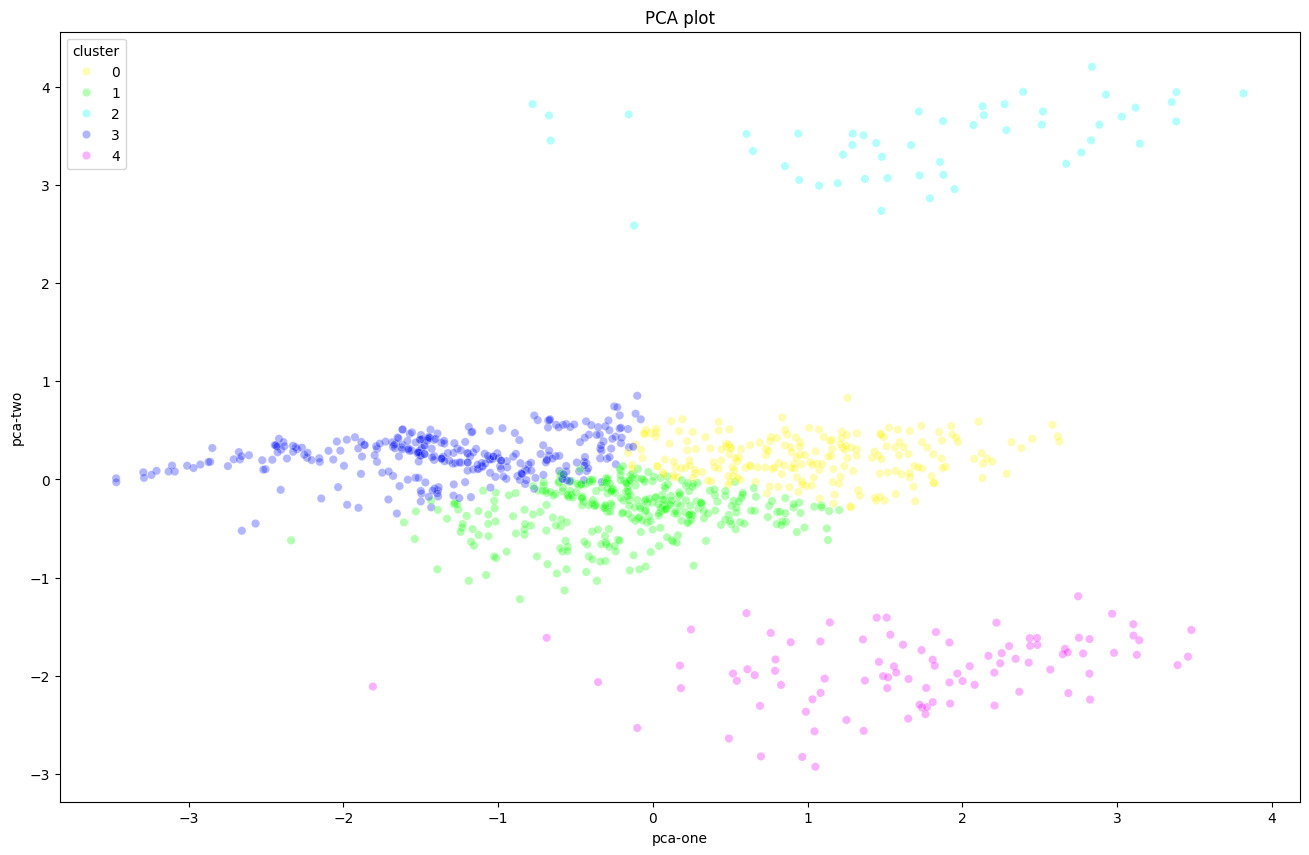

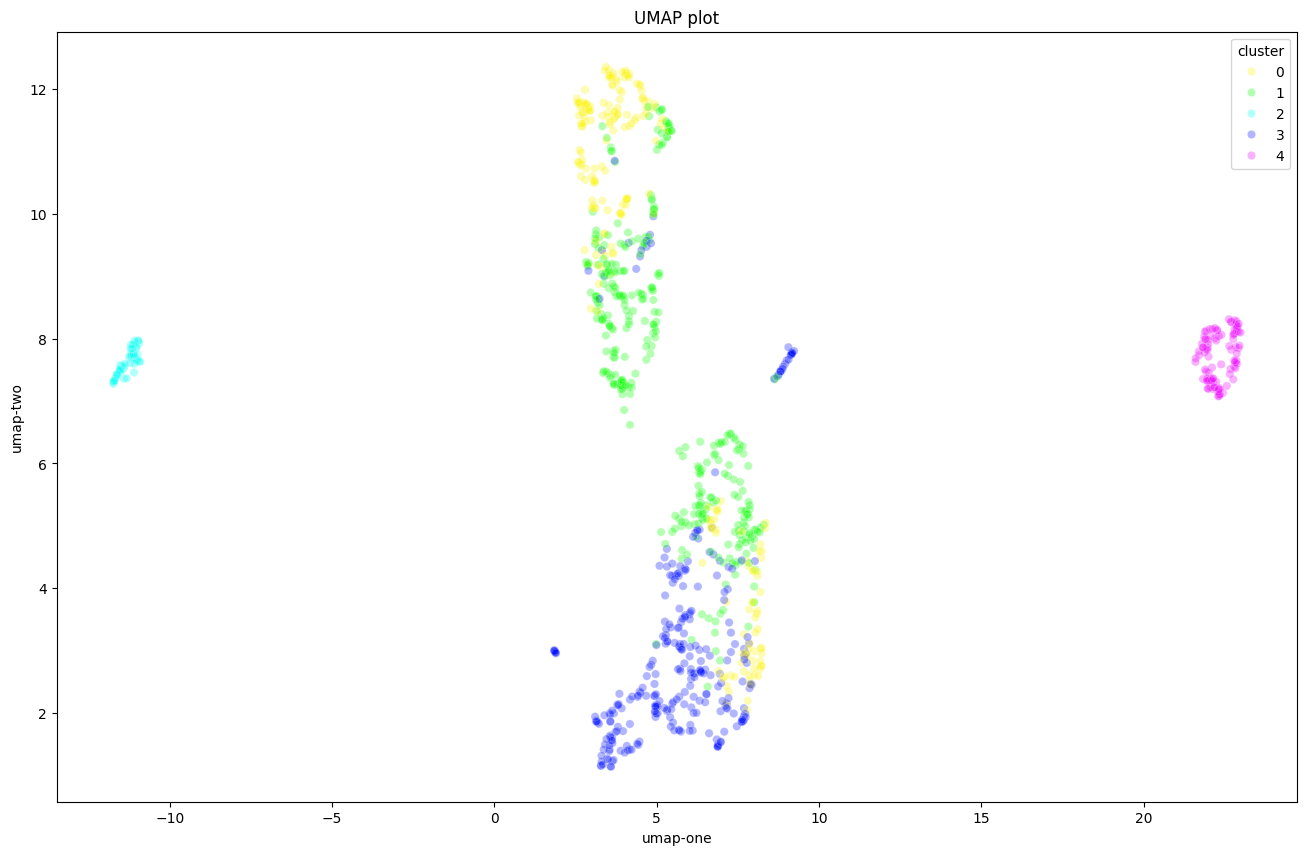

In [12]:
# Kmeans Clustering

model = 'Kmeans'
dataset = 'Reduced'
output_path = 'resultados/' + dataset + '_' + model

# folder de salida
if not os.path.exists(output_path):
    os.makedirs(output_path)


# metodo de silhouete score
k_optimo = silhoutte_method(df = df_reduced_scaled, model_name = model, output_file_path = output_path + '/silhouette.png')

# clustering
df_full_clustered, df_reduced_scaled_clustered = get_clusters(df_full, df_reduced_scaled,model,k_optimo)

# metricas
get_metrics(df_reduced_scaled_clustered, model)

# visualizaciones
plot_PCA(df_reduced_scaled_clustered, output_path + '/pca')
plot_UMAP(df_reduced_scaled_clustered, output_path + '/umap')

Silhouette score visualization saved
Metricas para Agglomerative
Silhouette Score: 0.3146958332452714
Davies-Bouldin Index: 1.212017247588088
Calinski-Harabasz Index: 174.76369918660453

Cantidad de datos por cluster:
Cluster 0: 856 datos
Cluster 1: 94 datos
Cluster 2: 50 datos


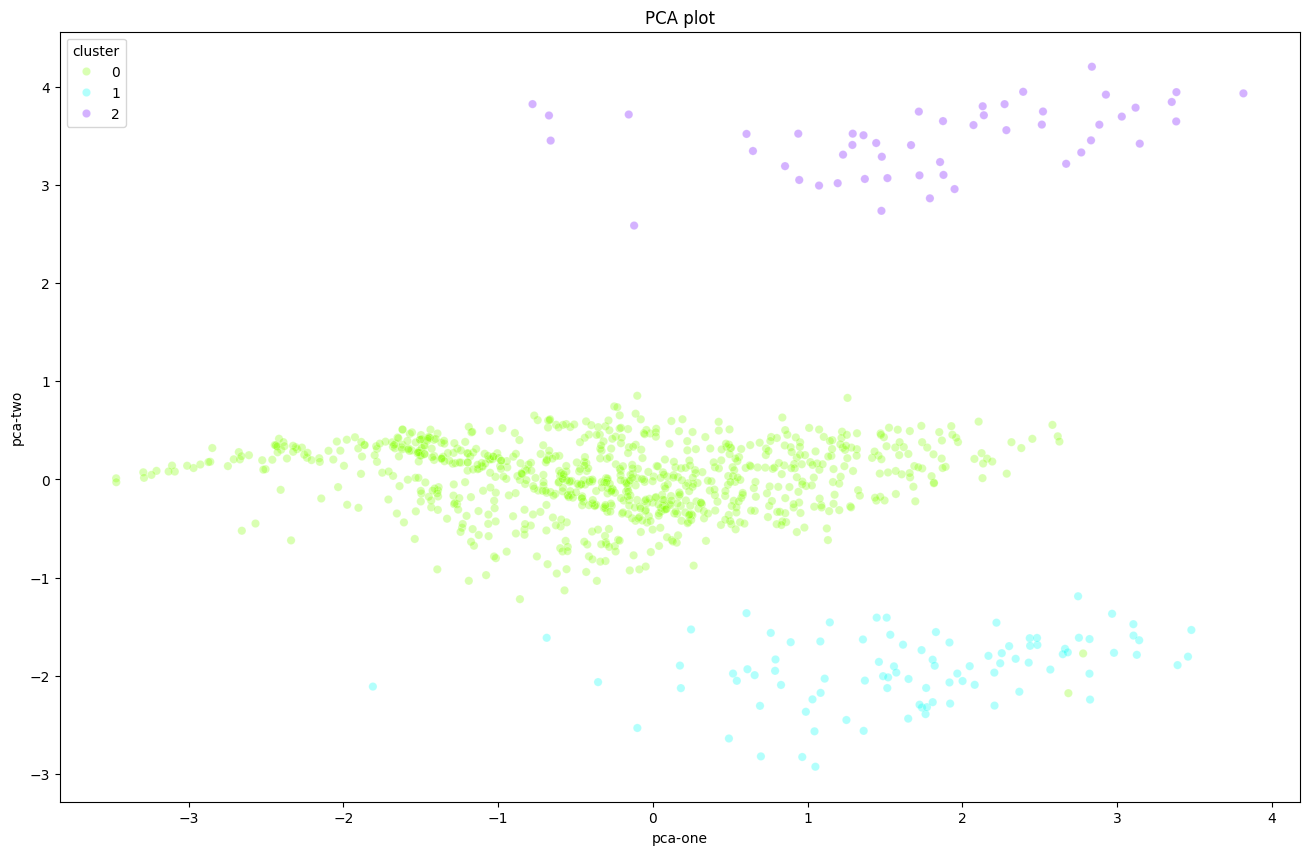

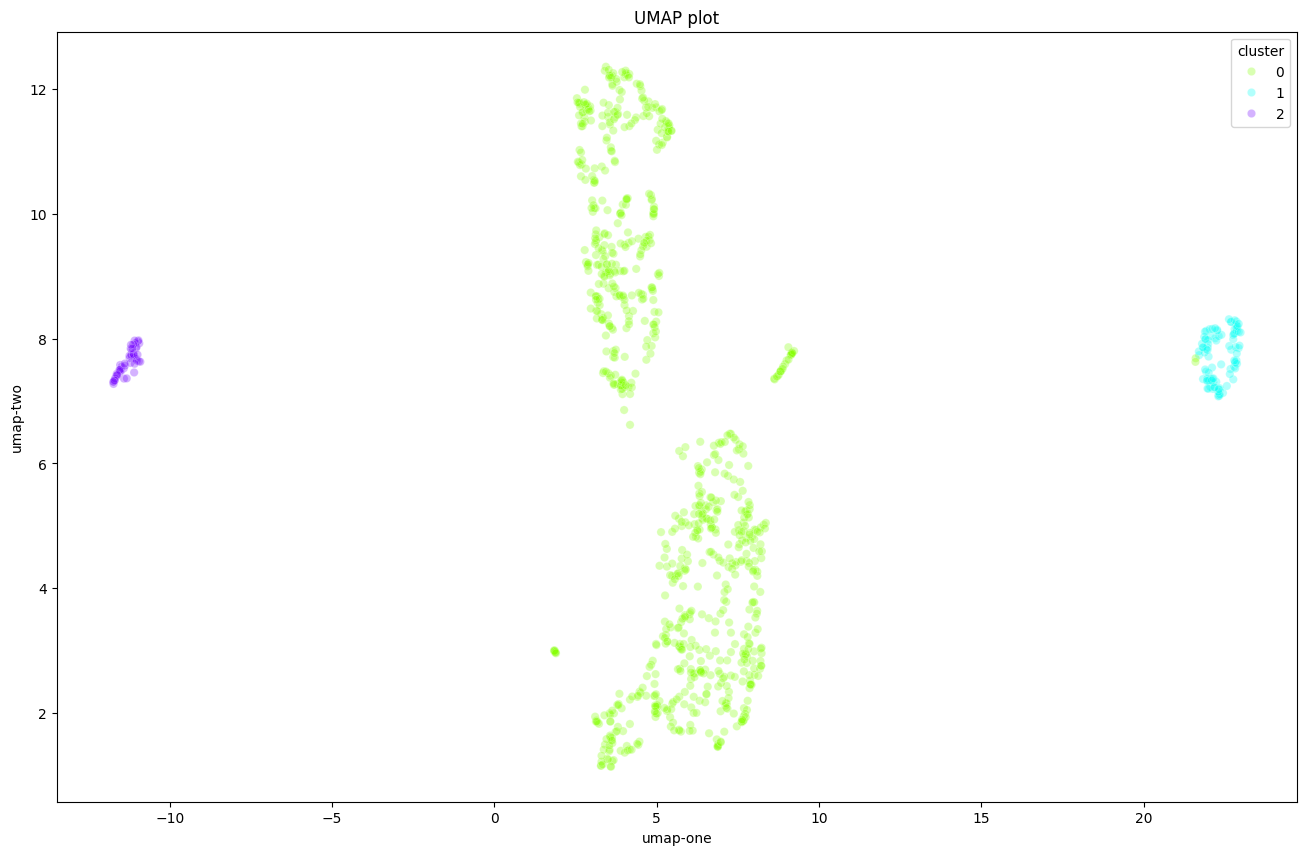

In [13]:
# Agglomerative Clustering

model = 'Agglomerative'
dataset = 'Reduced'
output_path = 'resultados/' + dataset + '_' + model

# folder de salida
if not os.path.exists(output_path):
    os.makedirs(output_path)


# metodo de silhouete score
k_optimo = silhoutte_method(df = df_reduced_scaled, model_name = model, output_file_path = output_path + '/silhouette.png')

# clustering
df_full_clustered, df_reduced_scaled_clustered = get_clusters(df_full, df_reduced_scaled,model,k_optimo)

# metricas
get_metrics(df_reduced_scaled_clustered, model)

# visualizaciones
plot_PCA(df_reduced_scaled_clustered, output_path + '/pca')
plot_UMAP(df_reduced_scaled_clustered, output_path + '/umap')

Silhouette score visualization saved
Metricas para GaussianMixture
Silhouette Score: 0.10884886981684523
Davies-Bouldin Index: 2.7183741388720186
Calinski-Harabasz Index: 117.93427937625925

Cantidad de datos por cluster:
Cluster 0: 534 datos
Cluster 1: 466 datos


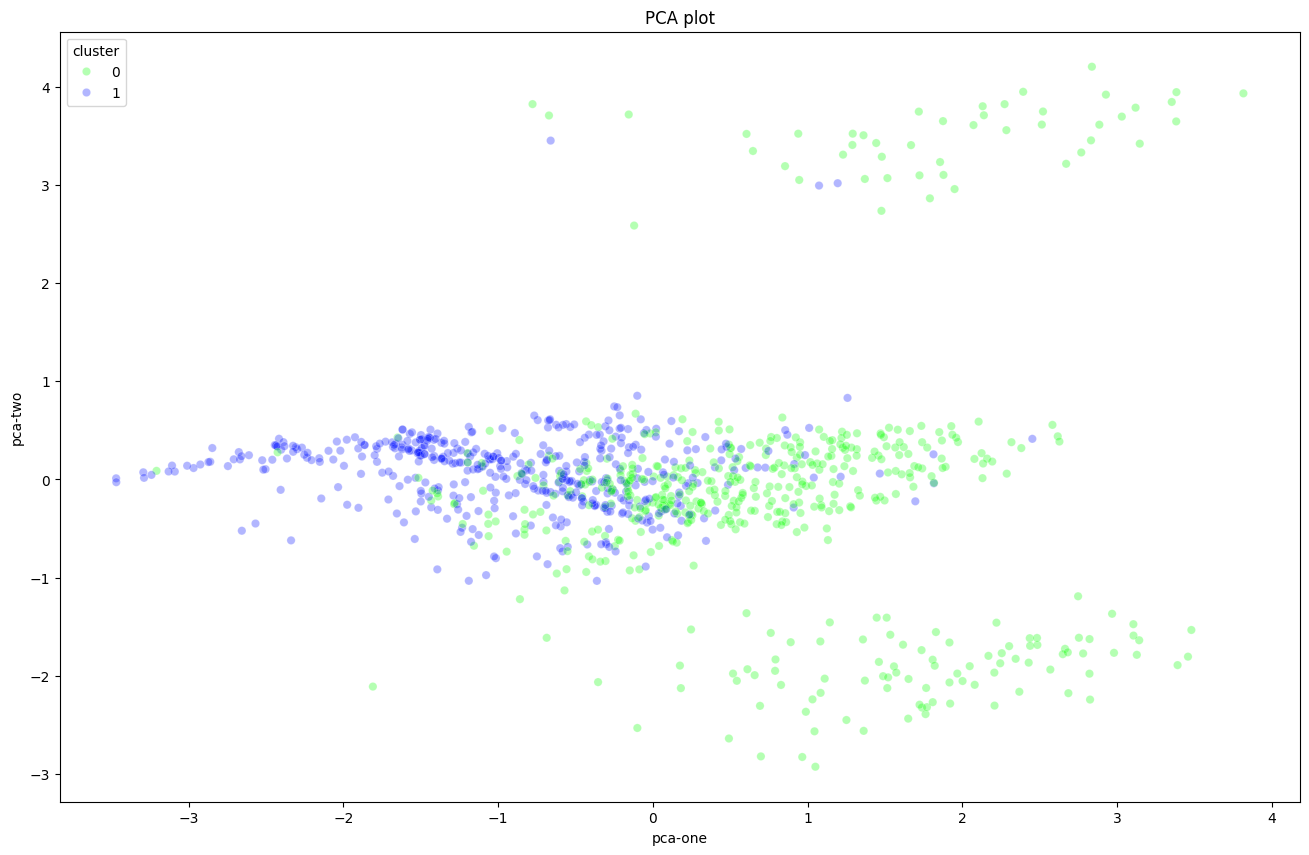

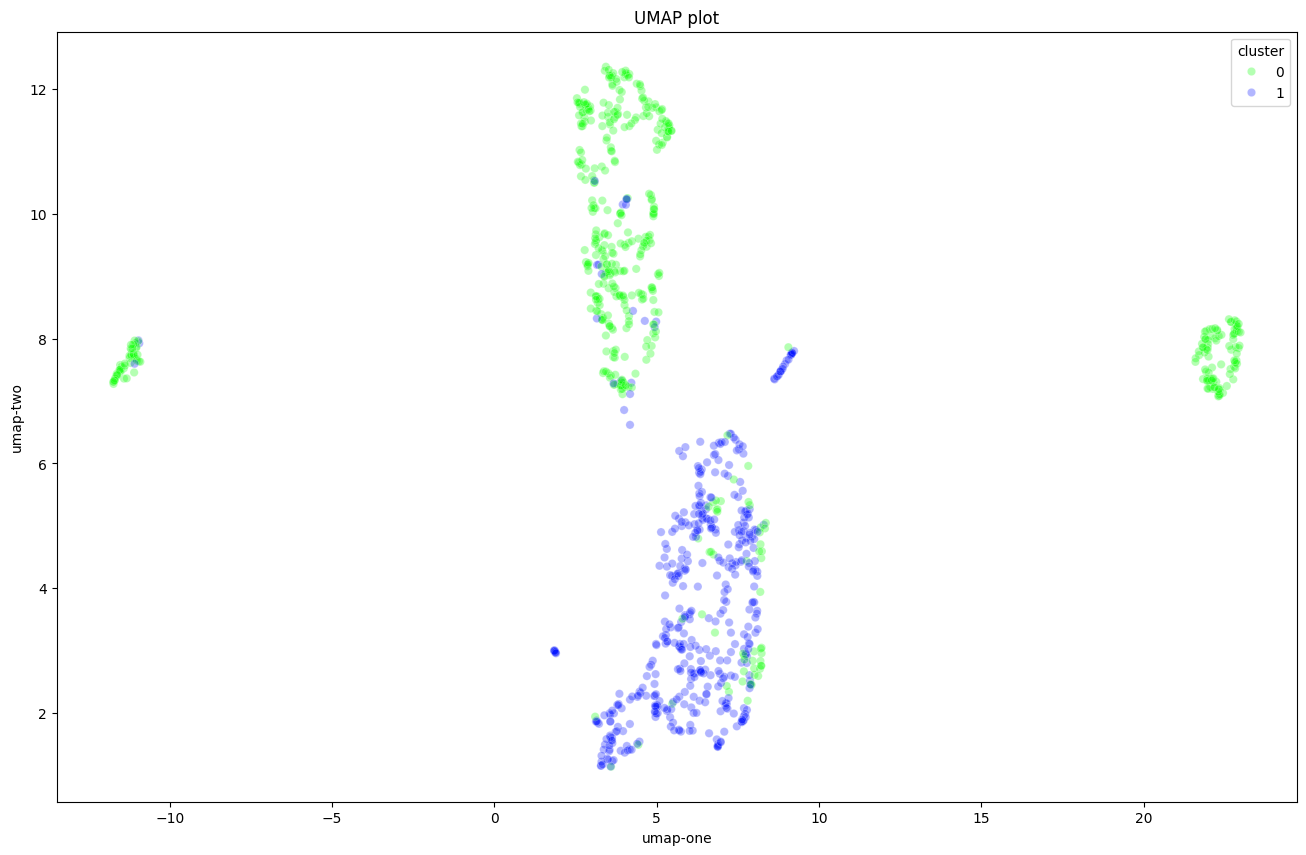

In [14]:
# GaussianMixture Clustering

model = 'GaussianMixture'
dataset = 'Reduced'
output_path = 'resultados/' + dataset + '_' + model

# folder de salida
if not os.path.exists(output_path):
    os.makedirs(output_path)

# metodo de silhouete score
k_optimo = silhoutte_method(df = df_reduced_scaled, model_name = model, output_file_path = output_path + '/silhouette.png')

# clustering
df_full_clustered, df_reduced_scaled_clustered = get_clusters(df_full, df_reduced_scaled,model,k_optimo)

# metricas
get_metrics(df_reduced_scaled_clustered, model)

# visualizaciones
plot_PCA(df_reduced_scaled_clustered, output_path + '/pca')
plot_UMAP(df_reduced_scaled_clustered, output_path + '/umap')